In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('pet_supplies_2212.csv')

In [3]:
df.tail()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1
1499,1500,Food,Cat,Medium,25.95,826.08,4.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [42]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [5]:
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [13]:
pd.DataFrame(df["product_id"].unique()).T.count().sum()

1500

In [18]:
df.groupby("category")["product_id"].count()

category
Accessory    126
Equipment    370
Food         260
Housing      227
Medicine     237
Toys         255
Unknown       25
Name: product_id, dtype: int64

In [15]:
df["category"].replace("-","Unknown",inplace=True)

In [20]:
df.groupby("category")["product_id"].count()

category
Accessory    126
Equipment    370
Food         260
Housing      227
Medicine     237
Toys         255
Unknown       25
Name: product_id, dtype: int64

In [19]:
df.groupby("animal")["product_id"].count()

animal
Bird    197
Cat     567
Dog     367
Fish    369
Name: product_id, dtype: int64

In [21]:
df.groupby("size")["product_id"].count()

size
LARGE      57
Large      75
MEDIUM    109
Medium    150
SMALL     157
Small     225
large     122
medium    233
small     372
Name: product_id, dtype: int64

In [22]:
df['size'] = df['size'].apply(lambda x: x.capitalize())

In [24]:
df.groupby("size")["product_id"].count()

size
Large     254
Medium    492
Small     754
Name: product_id, dtype: int64

In [41]:
df.groupby("price")["product_id"].count()

price
12.85         1
12.89         1
13.02         1
13.13         1
14.89         1
           ... 
54.03         1
54.05         1
54.07         2
54.16         1
unlisted    150
Name: product_id, Length: 707, dtype: int64

In [45]:
df["price"].replace("unlisted",np.nan,inplace=True)

In [47]:
df["price"]=df["price"].astype(float)

In [48]:
df["price"].median()

28.064999999999998

In [49]:
df["price"].fillna(28.06,inplace=True)

0       51.10
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: float64

In [69]:
df.groupby("price")["product_id"].count()

price
12.85    1
12.89    1
13.02    1
13.13    1
14.89    1
        ..
54.02    1
54.03    1
54.05    1
54.07    2
54.16    1
Name: product_id, Length: 706, dtype: int64

In [51]:
df.groupby("sales")["product_id"].count()

sales
286.94     1
288.01     1
290.77     1
291.19     1
362.05     1
          ..
2248.04    1
2248.63    1
2249.40    1
2254.99    1
2255.96    1
Name: product_id, Length: 1476, dtype: int64

In [55]:
df.groupby("sales")["product_id"].describe()

,count,mean,std,min,25%,50%,75%,max
sales,,,,,,,,
286.94,1.0,671.0,NaN,671.0,671.0,671.0,671.0,671.0
288.01,1.0,254.0,NaN,254.0,254.0,254.0,254.0,254.0
290.77,1.0,1385.0,NaN,1385.0,1385.0,1385.0,1385.0,1385.0
291.19,1.0,782.0,NaN,782.0,782.0,782.0,782.0,782.0
362.05,1.0,1360.0,NaN,1360.0,1360.0,1360.0,1360.0,1360.0
...,...,...,...,...,...,...,...,...
2248.04,1.0,449.0,NaN,449.0,449.0,449.0,449.0,449.0
2248.63,1.0,40.0,NaN,40.0,40.0,40.0,40.0,40.0
2249.40,1.0,295.0,NaN,295.0,295.0,295.0,295.0,295.0


In [56]:
df["sales"].dtype

dtype('float64')

In [66]:
df["rating"].isna().sum()

150

In [67]:
df["rating"].fillna(0,inplace=True)

In [68]:
df.groupby("rating")["product_id"].count()

rating
0.0    150
1.0     12
2.0     43
3.0    190
4.0    283
5.0    304
6.0    299
7.0    143
8.0     61
9.0     15
Name: product_id, dtype: int64

In [63]:
df["rating"].dtype

dtype('float64')

In [70]:
df["rating"].astype(int)

0       7
1       6
2       5
3       6
4       7
       ..
1495    5
1496    5
1497    3
1498    5
1499    4
Name: rating, Length: 1500, dtype: int64

In [71]:
df.groupby("rating")["product_id"].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
0.0,150.0,725.340000,445.772925,21.0,308.5,699.0,1148.75,1484.0
1.0,12.0,789.750000,416.045698,16.0,576.5,726.5,1003.75,1455.0
2.0,43.0,766.906977,443.849117,38.0,391.5,755.0,1170.00,1433.0
3.0,190.0,719.505263,442.293586,18.0,340.5,667.5,1089.50,1498.0
4.0,283.0,763.876325,419.307698,8.0,394.0,751.0,1120.00,1500.0
5.0,304.0,759.707237,444.273586,3.0,372.5,741.5,1152.25,1499.0
6.0,299.0,739.729097,438.167091,2.0,339.5,794.0,1122.00,1485.0
7.0,143.0,777.741259,418.800714,1.0,499.0,797.0,1068.00,1493.0
8.0,61.0,779.819672,430.831503,10.0,449.0,854.0,1142.00,1456.0


In [73]:
df.groupby("repeat_purchase")["product_id"].count()

repeat_purchase
0    594
1    906
Name: product_id, dtype: int64

In [75]:
df["repeat_purchase"].isna().sum()

0

In [76]:
df["repeat_purchase"].dtype

dtype('int64')

In [77]:
df.head(5)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [114]:
tot=df[["category","repeat_purchase"]].groupby("category").count()

In [115]:
tot["cats"]=tot.index

In [117]:
tot

,repeat_purchase,cats
category,,
Accessory,126,Accessory
Equipment,370,Equipment
Food,260,Food
Housing,227,Housing
Medicine,237,Medicine
Toys,255,Toys
Unknown,25,Unknown


<Axes: title={'center': 'Total Observations'}, xlabel='Categories', ylabel='Numbers of Observations'>

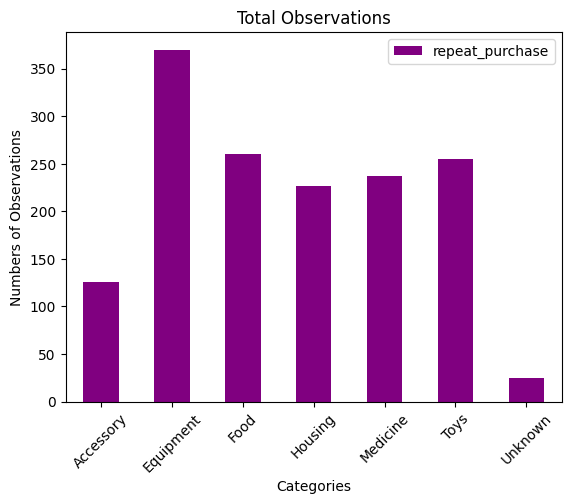

In [118]:
tot.plot(kind="bar", x="cats",y="repeat_purchase",title="Total Observations",xlabel="Categories",ylabel="Numbers of Observations",rot=45,color="purple")

In [195]:
tot_2=df[["category","repeat_purchase","product_id"]].groupby(["repeat_purchase","category"]).count()["product_id"].reset_index()

In [201]:
tot_2.rename(columns={"product_id":"quantity"},inplace=True)

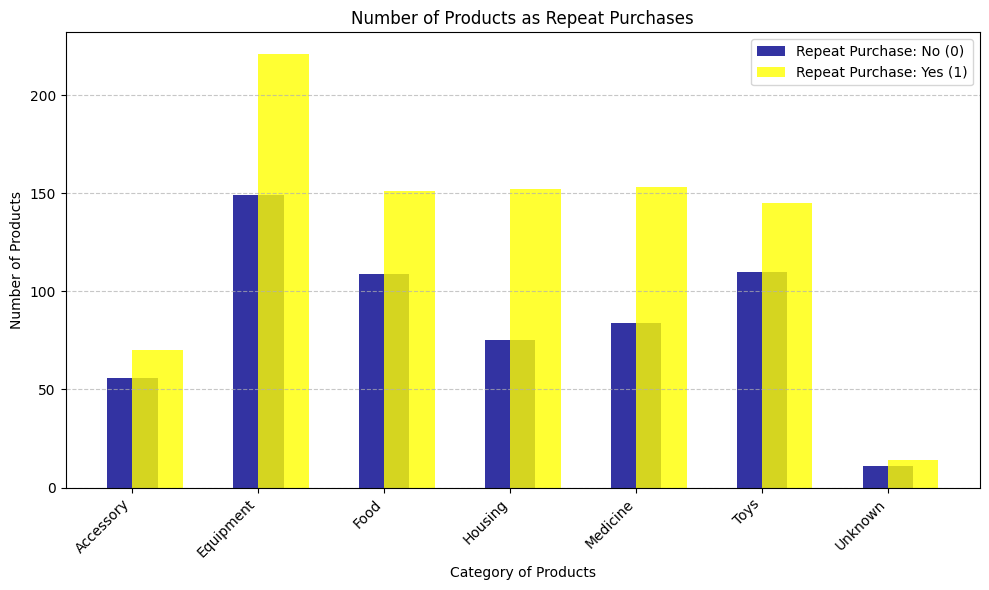

In [203]:
# repeat_purchase = 0 ve repeat_purchase = 1 için verileri ayırma
df_repeat_0 = tot_2[tot_2['repeat_purchase'] == 0]
df_repeat_1 = tot_2[tot_2['repeat_purchase'] == 1]

# Barları yan yana yerleştirmek için genişlik ayarını belirleme
bar_width = 0.4

# Plotlama
plt.figure(figsize=(10, 6))
plt.bar(df_repeat_0['category'], df_repeat_0['quantity'], width=bar_width, color='darkblue', alpha=0.8, label='Repeat Purchase: No (0)')
plt.bar(df_repeat_1['category'], df_repeat_1['quantity'], width=bar_width, color='yellow', alpha=0.8, label='Repeat Purchase: Yes (1)', align='edge')
plt.xlabel('Category of Products')
plt.ylabel('Number of Products')
plt.title('Number of Products as Repeat Purchases')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Axes: >

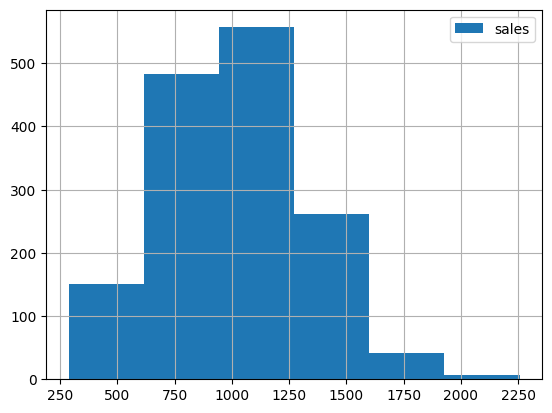

In [ ]:
df["sales"].hist(bins=6,legend=True)

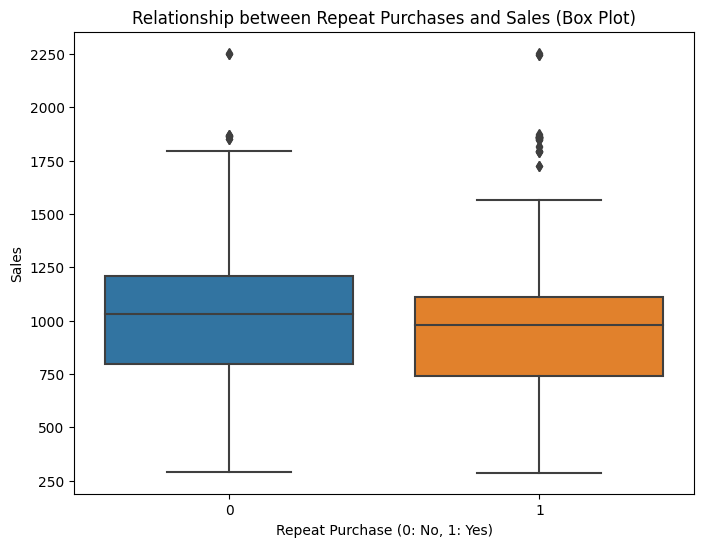

In [ ]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='repeat_purchase', y='sales', data=df)
plt.xlabel('Repeat Purchase (0: No, 1: Yes)')
plt.ylabel('Sales')
plt.title('Relationship between Repeat Purchases and Sales (Box Plot)')
plt.show()

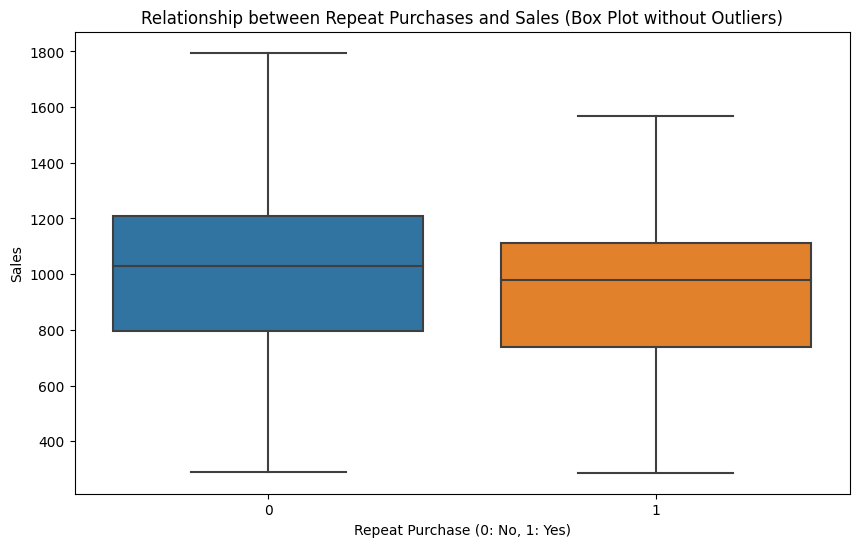

In [ ]:
# Box plot without removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='repeat_purchase', y='sales', data=df, showfliers=False)
plt.xlabel('Repeat Purchase (0: No, 1: Yes)')
plt.ylabel('Sales')
plt.title('Relationship between Repeat Purchases and Sales (Box Plot without Outliers)')
plt.show()


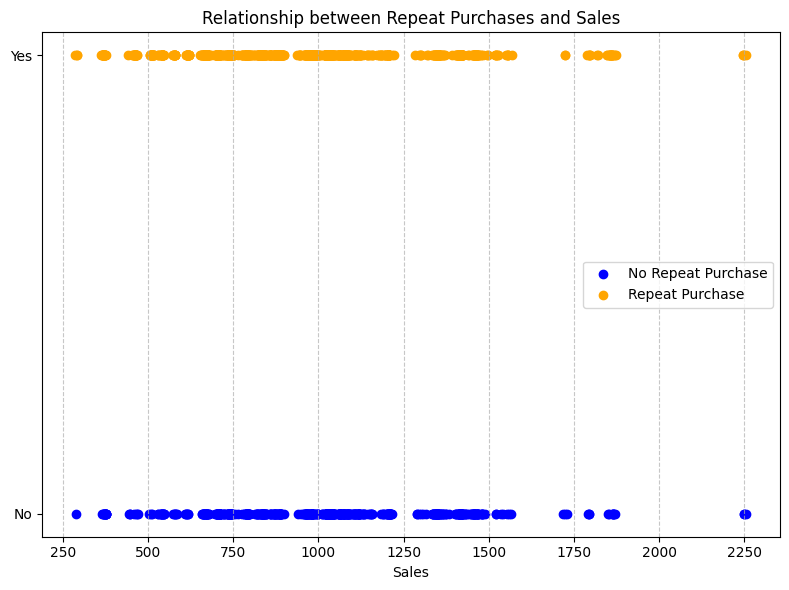

In [ ]:

plt.figure(figsize=(8, 6))


plt.scatter(df[df['repeat_purchase'] == 0]['sales'], [0] * df[df['repeat_purchase'] == 0].shape[0],
            marker='o', color='blue', label='No Repeat Purchase')

plt.scatter(df[df['repeat_purchase'] == 1]['sales'], [1] * df[df['repeat_purchase'] == 1].shape[0],
            marker='o', color='orange', label='Repeat Purchase')

plt.xlabel('Sales')
plt.yticks([0, 1], ['No', 'Yes'])
plt.title('Relationship between Repeat Purchases and Sales')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [204]:
df['sales'].corr(df['repeat_purchase'])

-0.07943499269258525